<a href="https://colab.research.google.com/github/carolflyjs/cs230/blob/master/Glove_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%run "/content/drive/My Drive/Colab Notebooks/Data_Processing_v2.ipynb"
%run "/content/drive/My Drive/Colab Notebooks/utils.ipynb"

     |████████████████████████████████| 1.9MB 3.3MB/s 


Using TensorFlow backend.


load_file(path, delimiter=","): return df
data_prep(df, x_columns, y_columns): return X_train, Y_train
removeSpellingErrors(df): return new_df
tokenize_and_pad(X_train), return X_train_padded, max_value, vocab_size, tokenizer
store_weights(mode, model_name, path="/content/drive/My Drive/cs230/")
load_weights(mode, model_name, path="/content/drive/My Drive/cs230/")
join_histories_and_plot(*histories)

load_embedding_matrix(embeddings_index, vocab_size, embedding_dim, word_index)
embedding_index = pre-trained embedding dictionary with key being the word and value being the embedding scores
vocab_size = total number of unique tokens in the training data
embedding_dim = dimension used in the embedding_index for each token
word_index = token dictionary with key being the word and value being the token



In [0]:
glove_file = keras.utils.get_file("glove.6B.zip", "http://nlp.stanford.edu/data/glove.6B.zip", extract=True)

862183424/862182613 [==============================] - 387s 0us/step


In [0]:
def load_glove(glove_dir, glove_file_name):
    embeddings_index = {}
    f = open(os.path.join(glove_dir, glove_file_name))
    for line in f:
        values = line.split()
        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
        except:
            pass
    f.close()
    return embeddings_index

In [0]:
embeddings_index = load_glove("/root/.keras/datasets/", "glove.6B.100d.txt")
embedding_dim = 100

In [0]:
def load_embedding_matrix(embeddings_index, vocab_size, embedding_dim, word_index):
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    not_found = []
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector
        else:
            not_found.append((word, i))
    return embedding_matrix, not_found

In [0]:
def build_glove_model(max_value, vocab_size, optimizer, embedding_matrix, embedding_dim = 100, ): 
    X_input = Input(shape=(max_value * 2,), dtype="int32")
    X = Embedding(vocab_size, embedding_dim, weights=[embedding_matrix])(X_input)
    X = keras.layers.Flatten("channels_last")(X)
    X = Dense(5, activation="softmax")(X)

    model = Model(inputs=[X_input], outputs=X)

    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_accuracy'])
    model.summary()

    return model

In [0]:
embedding_matrix, not_found = load_embedding_matrix(embeddings_index, vocab_size, embedding_dim, tokenizer.word_index)

In [0]:
learning_rate = 0.015
optimizer = keras.optimizers.Adagrad(lr=learning_rate)
model = build_glove_model(max_value=max_value, vocab_size=vocab_size, embedding_matrix=embedding_matrix, embedding_dim=embedding_dim, optimizer=optimizer)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 16)                0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 16, 100)           351700    
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 8005      
Total params: 359,705
Trainable params: 359,705
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train_tokenized, Y_train, validation_data=(X_dev_tokenized, Y_dev), epochs=50, batch_size=32, class_weight=class_weight) 

Train on 290693 samples, validate on 18723 samples
Epoch 1/50
290693/290693 [==============================] - 49s 169us/step - loss: 1.3785 - categorical_accuracy: 0.7436 - val_loss: 0.6226 - val_categorical_accuracy: 0.7627
Epoch 2/50
290693/290693 [==============================] - 50s 170us/step - loss: 1.1759 - categorical_accuracy: 0.7913 - val_loss: 0.5490 - val_categorical_accuracy: 0.7950
Epoch 3/50
290693/290693 [==============================] - 42s 146us/step - loss: 1.1232 - categorical_accuracy: 0.8028 - val_loss: 0.5223 - val_categorical_accuracy: 0.8051
Epoch 4/50
290693/290693 [==============================] - 44s 150us/step - loss: 1.0924 - categorical_accuracy: 0.8087 - val_loss: 0.5143 - val_categorical_accuracy: 0.8082
Epoch 5/50
290693/290693 [==============================] - 47s 162us/step - loss: 1.0706 - categorical_accuracy: 0.8130 - val_loss: 0.5125 - val_categorical_accuracy: 0.8084
Epoch 6/50
290693/290693 [==============================] - 47s 161us/step

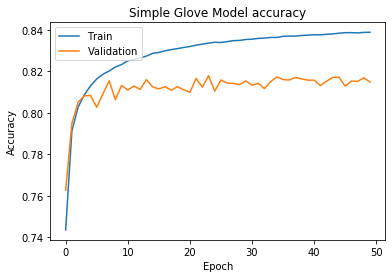

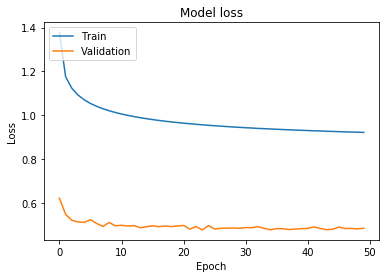

In [0]:
combined = join_histories_and_plot("Simple Glove Model", history)

In [0]:
model.evaluate(x=X_test_tokenized, y=Y_test)

3106/3106 [==============================] - 0s 27us/step


[0.4892966727805921, 0.8171281390856407]

In [0]:
getConfusionMatrix(model, X_test_tokenized, Y_test)

[[ 871   10   15   21   36]
 [   6 1008   18   18   32]
 [   7    1  144    9   45]
 [   2    5    6  161   31]
 [  39   42  105  120  354]]
